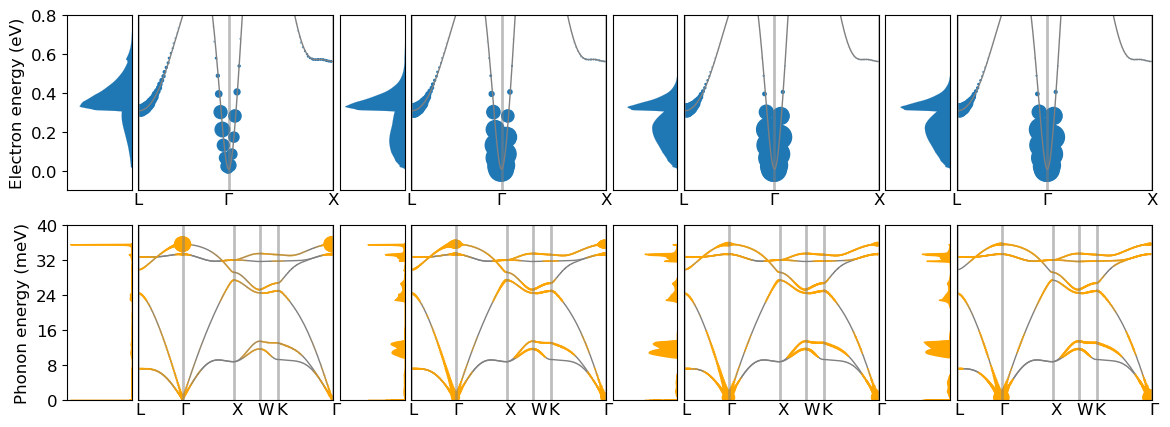

In [154]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator


def set_highsym_text(ax, pathpoint_names, pathpoint_coords, distance=0.0, shift=0.0):
    """
    Add texts for high symmetry path points 
    """
    coord_tmp = pathpoint_coords[0, :]
    
    for i in np.arange(pathpoint_coords.shape[0]):
        if pathpoint_names[i] == '':
            continue
        distance += norm(coord_tmp - pathpoint_coords[i, :])
        ax.text(distance-0.05, shift, pathpoint_names[i])
        coord_tmp = pathpoint_coords[i, :]
        ax.axvline(x=distance, color='tab:grey', alpha=0.5, lw=2)
    ax.set_xlim([0, distance])
    return distance


# Fermi energy
popu_dir = 'population_data'
str_dir = 'structure_data'
plot_tools_dir = 'plot_tools_data'

efermi = np.loadtxt(f'{plot_tools_dir}/efermi.dat')
# phonon frequency cut 
ph_freq_cut = 0.2 # meV


#### import data

# import selected k/q grid points close to the high symmetry paths
# kpath[0] is the x-axis to be ploted, kpath[1] is the indices in the original k-grid
kpath = np.loadtxt(f'{str_dir}/kgrid.dat')
qpath = np.loadtxt(f'{str_dir}/qgrid.dat')
pathpoint_names_k = ['L', r'$\Gamma$', 'X']
pathpoint_names_q1 = ['L', r'$\Gamma$', 'X', 'W']
pathpoint_names_q2 = ['', 'K', r'$\Gamma$']
pathpoint_coords_k = np.loadtxt(f'{plot_tools_dir}/pathpoints_k.dat')
pathpoint_coords_q1 = np.loadtxt(f'{plot_tools_dir}/pathpoints_q1.dat')
pathpoint_coords_q2 = np.loadtxt(f'{plot_tools_dir}/pathpoints_q2.dat')

# energies
band_structure = np.loadtxt(f'{str_dir}/band_structure.dat')
phonon_dispersion = np.loadtxt(f'{str_dir}/phonon_dispersion.dat').T
nband = np.shape(band_structure)[-1]
nmode = np.shape(phonon_dispersion)[-1]
plot_bands_x = np.loadtxt(f'{str_dir}/bands_lgx_x.dat')
plot_bands_y = np.loadtxt(f'{str_dir}/bands_lgx_y.dat')
carrier_energy_lim = 0.8

## import populations at 0, 100fs, 1ps, 10ps and 80ps
# time vector
tvec = ["0.5", "5", "20", "80"]
# emtpy dictionaries for data stroage
carrier_pop = {}
phonon_pop = {}

carrier_pop["0.5"] = np.loadtxt(f'{popu_dir}/cpop0.5.dat')
carrier_pop["5"] = np.loadtxt(f'{popu_dir}/cpop5.dat')
carrier_pop["20"] = np.loadtxt(f'{popu_dir}/cpop20.dat')
carrier_pop["80"] = np.loadtxt(f'{popu_dir}/cpop80.dat')
# phonon population boundaries already tiled
phonon_pop0 = np.array(np.loadtxt(f'{popu_dir}/phpop0.dat'))
phonon_pop["0.5"] = np.array(np.loadtxt(f'{popu_dir}/phpop0.5.dat'))
phonon_pop["5"] = np.loadtxt(f'{popu_dir}/phpop5.dat')
phonon_pop["20"] = np.loadtxt(f'{popu_dir}/phpop20.dat')
phonon_pop["80"] = np.loadtxt(f'{popu_dir}/phpop80.dat')

electron_E = np.loadtxt(f'{popu_dir}/eE.dat')
phonon_E = np.loadtxt(f'{popu_dir}/phE.dat')
phonon_E0 = np.loadtxt(f'{popu_dir}/phE0.dat')

egrid = np.loadtxt(f'{str_dir}/egrid.dat')
phgrid = np.loadtxt(f'{str_dir}/phgrid.dat')


### plot figure
plt.rcParams.update({'font.size':12})
fig = plt.figure(figsize=(14,5))
num_plots = 4
num_widths = np.tile(np.array([1,3]), (num_plots,))
gs = gridspec.GridSpec(2, num_plots*2, height_ratios=[1,1], width_ratios=num_widths, wspace=0.05)
color_disp = [np.array([1,149,150])/225.0, 'tab:blue']

for i in np.arange(num_plots):
    
    ## axis setting
    axe = fig.add_subplot(gs[0, 2 * i + 1])
    axph = fig.add_subplot(gs[1, 2 * i + 1])
    axed = fig.add_subplot(gs[0, 2 * i])
    axphd = fig.add_subplot(gs[1, 2 * i])
    
    axe.xaxis.set_visible(False)
    axed.xaxis.set_visible(False)
    axe.yaxis.set_visible(False) 
    if i >= 1:
        axed.yaxis.set_visible(False)
    if i == 0:
        axphd.set_ylabel('Phonon energy (meV)')
        axed.set_ylabel('Electron energy (eV)')
    
    axe.set_ylim([-0.1, carrier_energy_lim])
    axed.set_ylim([-0.1, carrier_energy_lim])
    axed.set_xlim([0,0.28])
    axed.yaxis.set_major_locator(MaxNLocator(nbins=5))
    axed.invert_xaxis()
       
    axph.xaxis.set_visible(False)
    axph.yaxis.set_visible(False)
    axphd.xaxis.set_visible(False)
    if i > 0:
        axphd.yaxis.set_visible(False)
    axphd.yaxis.set_major_locator(MaxNLocator(nbins=5))
    axphd.set_xlim([0,40])
    axphd.invert_xaxis()
        
    #### plot carriers     

    # plot points on band structure
    # band structure
    carriers = carrier_pop[tvec[i]]

    axe.scatter(kpath, band_structure - efermi, s=300*carriers, color=color_disp[1])
    axe.plot(plot_bands_x[:,0], plot_bands_y[:,4]-efermi, color='grey', lw=1)
    
    # plot f(E)
    inds = np.where(egrid>efermi)[0]
    axed.fill_between(electron_E[i,inds], egrid[inds] - efermi, color=color_disp[1], lw=0.1)
    axed.axhline(y=0, color='w', lw=2.4)
    distance = 0
    max_distance = set_highsym_text(axe, pathpoint_names_k, pathpoint_coords_k, distance, -0.17)
    axe.set_xlim([0, max_distance])
    distance = 0
    distance = set_highsym_text(axph, pathpoint_names_q1, pathpoint_coords_q1, distance, -3.2)
    max_distance = set_highsym_text(axph, pathpoint_names_q2, pathpoint_coords_q2, distance, -3.2)
    
    #axph.set_xlim([0, max_distance])
    
    #### plot phonons

    uplimit = 5 # upper limit of phonon population difference to plot
    for imode in range(nmode):
        # phonon dispersion
        axph.plot(qpath, phonon_dispersion[:, imode], color='grey', lw=1, zorder=0)
        
        # change in population N_nuq above the frequency cutoff
        pind = np.where(phonon_dispersion[:, imode] > ph_freq_cut)[0]
        diffphpops = phonon_pop[tvec[i]] - phonon_pop0
        colors = np.where(np.sign(diffphpops)==1, 'orange', 'tab:brown')
        alphas = np.where(np.sign(diffphpops)==1, 1, 0)

        #diffphpops[diffphpops > uplimit] = uplimit
        
        axph.scatter(qpath[pind], phonon_dispersion[pind, imode], 
                     s=120*np.abs(diffphpops[pind, imode]), 
                     color=colors[pind, imode], alpha=alphas[pind,imode])

  
    # plot N(E)
    #print(phgrid)
    pindE = np.where(phgrid > ph_freq_cut)[0]

    diffpph = phonon_E[i,:] - phonon_E0
    axphd.fill_between(diffpph[pindE], phgrid[pindE], color='orange')
    
    axph.set_ylim([0.0, 40])
    axphd.set_ylim([0.0, 40])
    axphd.set_xlim([0,40])
    axed.set_xlim([0,0.05])
    axphd.invert_xaxis()
    axed.invert_xaxis()

#plt.tight_layout()
plt.savefig('figure5.png',dpi=600)
   